In [2]:
import pandas as pd
import numpy as np

# Read a comma-separated values (csv) file into DataFrame.

The data folder contains a file named "newark_tree_data.csv". Read this file into a dataframe.


resources:
* [Pandas read csv docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [3]:
# Create DataFrame here.
df = pd.read_csv('data/newark_tree_data.csv')

In [4]:
# Display the first few rows of the DataFrame here.
df.head()

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
0,11.0,Elan Park,Elan Park,2,Blue Hen Rg,11.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,40,0-5%,0-5%
1,12.0,Elan Park,Elan Park,2,Blue Hen Rg,12.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,41,0-5%,0-5%
2,13.0,Elan Park,Elan Park,2,Blue Hen Rg,13.0,Front,False,"pine, eastern white",Pinus strobus,...,False,False,False,False,True,False,No,54,0-5%,6-10%
3,14.0,Elan Park,Elan Park,2,Blue Hen Rg,14.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,57,11-15%,26-30%
4,15.0,Elan Park,Elan Park,2,Blue Hen Rg,15.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,55,11-15%,21-25%


In [5]:
# How many columns does the DataFrame contain?
len(df.columns)

54

In [6]:
# What attributes (columns) does this DataFrame contain?
df.columns


Index(['ID', 'ON', 'AREA', 'ADDRESS', 'STREET', 'SITE', 'SIDE', 'ASSIGNED',
       'COMMON', 'BOTANICAL', 'CULTIVAR', 'DBH', 'REMOVAL', 'STEMS', 'COND',
       'MAINTPRIM', 'OBSERVE', 'INSPECT', 'LOCATION', 'NOTES', 'DATE', 'TIME',
       'STAFF', 'XCOORD', 'YCOORD', 'FAILURE', 'LIKELIHOOD', 'TARGET',
       'CONSEQ', 'RISK', 'UNIQUEID', 'EDITTIME', 'SPREAD', 'HEIGHT',
       'CLEARANCE', 'DECAYCL', 'DECAYT', 'DECAYRF', 'DAMC', 'DAMT', 'DAMRF',
       'CAVITYCL', 'CAVITYT', 'CAVITYRF', 'IMPROPMULC', 'IMPROPPRUN',
       'NUTRIENTD', 'PEST', 'GIRDLING', 'STRESS', 'OHUTILITY', 'TOP_HEIGHT',
       'CROWN_M', 'CROWN_DIE'],
      dtype='object')

Upon reviewing the columns of the DataFrame, we see that there is already a column named ID that is well suited for an index column.  

For the purposes of this lab, we are only going to need a few of the available attributes. The attributes we wish to keep are listed below:
* ID
* UNIQUEID
* COMMON
* BOTANICAL
* COND
* RISK
* HEIGHT

Let's provide the index_col and the usecols args when we invoke the read_csv method.

In [7]:
# Create the new DataFrame here.
#new_df = df[['ID','UNIQUEID','COMMON','BOTANICAL','COND','RISK','HEIGHT']].copy()
new_df = pd.DataFrame(df, columns= ['ID','UNIQUEID','COMMON','BOTANICAL','COND','RISK','HEIGHT'])

In [8]:
# Display the first few rows of the new DataFrame here.
new_df.head()

,ID,UNIQUEID,COMMON,BOTANICAL,COND,RISK,HEIGHT
0,11.0,LM 20150929141218,"arborvitae, eastern",Thuja occidentalis,Good,Low,40
1,12.0,LM 20150929141418,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,40
2,13.0,LM 20150929141844,"pine, eastern white",Pinus strobus,Good,Low,54
3,14.0,LM 20150929142424,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,56
4,15.0,LM 20150929143018,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,55


The data narritive specifies that 4,193 sites were inventoried. Use the DataFrame shape attribute to verify the number of rows.

In [9]:
# How many rows does your DataFrame contain.
new_df.shape

(4193, 7)

Let's look at the distribution of data for the HEIGHT attribute.

In [10]:
# What is the min height?
new_df[['HEIGHT']].min()

HEIGHT    0
dtype: int64

In [11]:
# What is the max height?
new_df[['HEIGHT']].max()

HEIGHT    140
dtype: int64

In [12]:
# How do we acquire count, mean, standard deviation, and distribution information from the DataFrame 
# by invoking a single method?
new_df.describe()

,ID,HEIGHT
count,4193.000000,4193.000000
mean,2097.000000,55.311472
std,1210.559168,36.293489
min,1.000000,0.000000
25%,1049.000000,23.000000
50%,2097.000000,50.000000
75%,3145.000000,86.000000
max,4193.000000,140.000000


# Plot a histogram using the HEIGHT attribute. 

resources:
* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
* [Pandas Series Hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist)

In [13]:
# Apply magic command to display matplotlib images inline
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4ea2ca7c0>]],
      dtype=object)

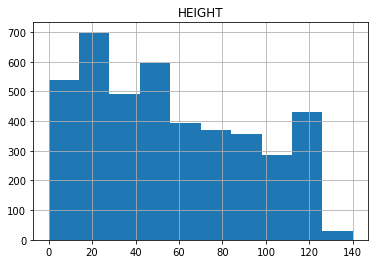

In [14]:
# Create a histogram using the HEIGHT attribute here
hist_df = df[['HEIGHT']].copy()
hist_df.hist()

The data narrative specifies the following:
"A total of 4,193 sites were inventoried, including 4,087 trees, 100 stumps, and 6 vacant planting sites"

Earlier, we were able to validate the total number of entries in the DataFrame. Let's now dig in a bit deeper and validate the stumps and vacant planting sites.

In [15]:
# How many entries are stumps
#hist_df.loc[hist_df['HEIGHT'] == 0].count()
# df[(df['HEIGHT'] <5 ) & (df['SITE'] ==1 )] 
# df.info()
# df[(df.BOTANICAL =="stump") | (df.BOTANICAL=="vacant site, large")]
# df2 = df[(df.a != -1) | (df.b != -1)]

# options = ['vacant']
# rslt_df = df[df['BOTANICAL'].isin(options)]
# rslt_df
df[df['BOTANICAL'].str.contains('vacant|stump')]

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
118,119.0,George Wilson Center & Park,George Wilson Center & Park,303,New London Rd,10.0,Front,False,stump,stump,...,False,False,False,False,False,False,No,0,0-5%,0-5%
119,120.0,George Wilson Center & Park,George Wilson Center & Park,303,New London Rd,11.0,Front,False,stump,stump,...,False,False,False,False,False,False,No,0,0-5%,0-5%
268,269.0,Olan Thomas Park,Olan Thomas Park,1000,Paper Mill Rd,31.0,Front,False,stump,stump,...,False,False,False,False,False,False,No,0,0-5%,0-5%
269,270.0,Olan Thomas Park,Olan Thomas Park,1000,Paper Mill Rd,32.0,Front,False,stump,stump,...,False,False,False,False,False,False,No,0,0-5%,0-5%
270,271.0,Olan Thomas Park,Olan Thomas Park,1000,Paper Mill Rd,33.0,Front,False,stump,stump,...,False,False,False,False,False,False,No,0,0-5%,0-5%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,4095.0,Hawthorne Av,Anna Way Basins,24,Hawthorne Av,44.0,Front,False,stump,stump,...,False,False,False,False,False,False,No,0,0-5%,0-5%
4148,4149.0,Rahway Dr,Rahway Drive Open Space,945,Rahway Dr,11.0,Front,False,stump,stump,...,False,False,False,False,False,False,No,0,0-5%,0-5%
4166,4167.0,Delaware Av,Downtown Public Parking Lots,0,Delaware Av,63.0,Front,False,stump,stump,...,False,False,False,False,False,False,No,0,0-5%,0-5%
4167,4168.0,Delaware Av,Downtown Public Parking Lots,0,Delaware Av,64.0,Front,False,stump,stump,...,False,False,False,False,False,False,No,0,0-5%,0-5%


In [16]:
# How many entries are vacant sites
df[df['BOTANICAL'].str.contains('vacant')]

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
3912,3913.0,E Main St,Main Street Tree Pits (40 total),74,E Main St,1.0,Front,False,"vacant site, large",vacant site large,...,False,False,False,False,False,False,No,0,0-5%,0-5%
3921,3922.0,E Main St,Main Street Tree Pits (40 total),47,E Main St,1.0,Front,False,"vacant site, large",vacant site large,...,False,False,False,False,False,False,Yes,0,0-5%,0-5%
3938,3939.0,E Main St,Main Street Tree Pits (40 total),179,E Main St,1.0,Front,False,"vacant site, large",vacant site large,...,False,False,False,False,False,False,Yes,0,0-5%,0-5%
3940,3941.0,E Main St,Main Street Tree Pits (40 total),7,N Chapel St,2.0,Front,False,"vacant site, large",vacant site large,...,False,False,False,False,False,False,No,0,0-5%,0-5%
3945,3946.0,E Main St,Main Street Tree Pits (40 total),148,E Main St,1.0,Front,False,"vacant site, large",vacant site large,...,False,False,False,False,False,False,No,0,0-5%,0-5%
3946,3947.0,E Main St,Main Street Tree Pits (40 total),148,E Main St,2.0,Front,False,"vacant site, large",vacant site large,...,False,False,False,False,False,False,No,0,0-5%,0-5%


In [17]:
# Do these number add up?


# Plot a bar graph using the COND attribute.

resources:
* [Pandas Series Bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html#pandas.Series.plot.bar)

In [27]:
# How can we determine all of the possible values describing the condition of a tree and their associated counts?
# df.COND.unique()
# df = df.groupby('COND').nunique()
# df.groupby("COND").count()
df_tree_counts = df.COND.value_counts().reset_index().rename(
           columns={'index': 'Tree_cond', 'COND':'count'})
df_tree_counts

,Tree_cond,count
0,Fair,1598
1,Good,1168
2,Poor,402
3,Very Good,381
4,Dead,218
5,Excellent,163
6,Very Poor,83
7,Critical,74


In [28]:
# Were these already in the order you would want them to be in order for a graph to make sense? 
# If not, reorder  the Series.
# yes,there are in order

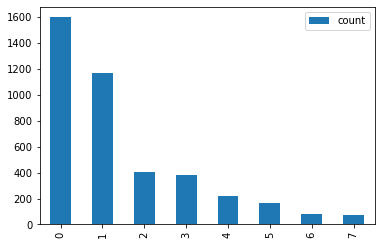

In [29]:
# Plot the Series here
df_tree_counts.plot.bar()

In [34]:
# How many entries have missing values for the COND attribute? Why are these values missing?
df['COND'].isnull().sum()

106

# Plot a pie chart using the RISK attribute.

resources:
* [Pandas Series Pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html#pandas.Series.plot.pie)
* [matplotlib pie chart docs](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

In [35]:
# How can we determine all of the possible values describing the RISK associated with each tree
# along with the corresponding row counts?
df_risks_counts = df.RISK.value_counts().reset_index().rename(
           columns={'index': 'Risk_Cond','RISK':'count'})
df_risks_counts

,Risk_Cond,count
0,Low,3833
1,Moderate,241
2,High,13


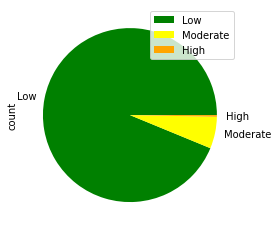

In [71]:
# Create an array containing the colors green, yellow, and orange
# When we create our pie chart, the colors should be associated with the attributes according to the specifications below:
# Green -> Low
# Yellow -> Moderate
# Orange -> High

my_colors = ['Green','Yellow','Orange' ]
my_labels = ['Low','Moderate','High']
plot = df_risks_counts.plot(kind='pie',y='count',labels = my_labels,colors=my_colors)



In [ ]:
# Plot the pie chart here


In [38]:
# How many entries have missing values for the RISK attribute? Why are these values missing?
df['RISK'].isnull().sum()

106

# Indexing

In [43]:
# Display row by position 1
df.loc[0]

ID                              11
ON                       Elan Park
AREA                     Elan Park
ADDRESS                          2
STREET                 Blue Hen Rg
SITE                            11
SIDE                         Front
ASSIGNED                     False
COMMON         arborvitae, eastern
BOTANICAL       Thuja occidentalis
CULTIVAR                       NaN
DBH                             15
REMOVAL                        NaN
STEMS                            2
COND                          Good
MAINTPRIM                      NaN
OBSERVE                       None
INSPECT                      False
LOCATION                      Park
NOTES                          NaN
DATE                     9/29/2015
TIME                    2:12:18 PM
STAFF                           LM
XCOORD                      553199
YCOORD                      611651
FAILURE                   Possible
LIKELIHOOD                Unlikely
TARGET                      Medium
CONSEQ              

In [49]:
# Display row by label 1
df.loc[df.loc[:,'ID'] ==1]


,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
15,1.0,Elan Park,Elan Park,2,Blue Hen Rg,1.0,Front,False,"locust, black",Robinia pseudoacacia,...,False,False,False,False,False,True,No,39,51-55%,46-50%
